In [1]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
x_train, y_train=make_blobs(n_samples=800, n_features=2, centers=[[1,1],[-1,1],[-1,-1],[1,-1]], shuffle=True, cluster_std=0.3)
x_test, y_test=make_blobs(n_samples=200, n_features=2, centers=[[1,1],[-1,1],[-1,-1],[1,-1]], shuffle=True, cluster_std=0.3)

In [3]:
x_train

array([[-0.98114695, -1.06318985],
       [-1.19037886,  1.29167301],
       [ 0.95431214,  1.40101494],
       ...,
       [-0.70448877,  1.01424256],
       [ 1.50843891, -0.64912983],
       [ 0.9415658 ,  0.50094798]])

In [4]:
y_train

array([2, 1, 0, 3, 1, 3, 0, 2, 1, 1, 2, 3, 2, 0, 1, 0, 3, 2, 2, 2, 3, 0,
       0, 0, 0, 2, 3, 0, 2, 0, 0, 2, 2, 0, 2, 3, 2, 3, 1, 1, 2, 0, 3, 2,
       0, 1, 3, 0, 2, 1, 3, 2, 3, 3, 1, 0, 3, 2, 0, 2, 1, 2, 1, 2, 0, 0,
       3, 3, 0, 2, 1, 1, 1, 0, 3, 1, 1, 0, 1, 2, 0, 2, 1, 3, 0, 2, 0, 2,
       3, 1, 1, 2, 2, 2, 2, 3, 3, 2, 0, 0, 2, 1, 2, 3, 0, 3, 1, 1, 3, 0,
       2, 0, 2, 0, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 2, 3, 1, 1, 0, 1,
       3, 1, 2, 2, 1, 2, 2, 1, 1, 3, 1, 3, 2, 0, 2, 3, 1, 1, 3, 0, 3, 3,
       2, 3, 1, 0, 2, 2, 0, 1, 0, 2, 0, 1, 3, 0, 2, 1, 1, 1, 1, 1, 3, 0,
       3, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 3, 0, 3, 0, 1, 1, 1, 3,
       3, 2, 2, 3, 3, 2, 0, 1, 2, 1, 2, 1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1,
       0, 2, 1, 2, 2, 1, 0, 3, 1, 3, 3, 1, 1, 0, 3, 2, 2, 1, 2, 0, 2, 3,
       3, 1, 3, 2, 0, 3, 2, 3, 3, 3, 1, 3, 3, 1, 0, 0, 3, 2, 2, 0, 0, 2,
       3, 1, 2, 3, 3, 3, 1, 0, 0, 3, 3, 3, 2, 2, 1, 2, 1, 3, 3, 1, 3, 3,
       0, 2, 2, 3, 1, 2, 1, 2, 2, 3, 2, 1, 1, 0, 1,

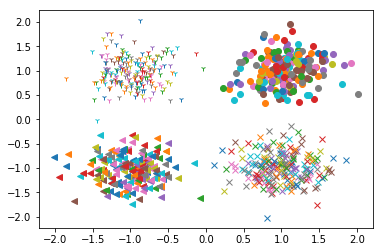

In [5]:
def visualize_dots(x, y = None, c='r'):
    if y is None:
        y=[None]*len(x)
    for x_, y_ in zip(x, y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor='none', markeredgecolor=c)
        else:
            if y_==0:
                plt.plot(x_[0], x_[1], 'o')
            elif (y_==1):
                plt.plot(x_[0], x_[1], '1')
            elif (y_==2):
                plt.plot(x_[0], x_[1], '<')
            else:
                plt.plot(x_[0], x_[1], 'x')
plt.figure()
visualize_dots(x_train, y_train, c='r')
plt.show()

<h3>The scattergram above has four clusters.</h3>

In [10]:
def label_data_to_bin(y_, from_, to_):
    newy=numpy.copy(y_)
    for f in from_:
        newy[y_==f]=to_
    return newy

In [11]:
y_train=label_data_to_bin(y_train,[0,2],0)
y_train=label_data_to_bin(y_train,[1,3],1)
y_test=label_data_to_bin(y_test,[0,2],0)
y_test=label_data_to_bin(y_test,[1,3],1)

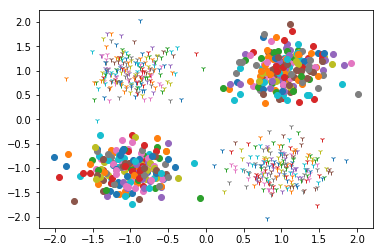

In [12]:
plt.figure()
visualize_dots(x_train, y_train, c='r')
plt.show()

<h3>For practicing binary clasification with pytorch, modified cluster data and visualized it into new scattergram</h3>

<p><b>Thia grammer was somewhat unfarmiliar with me.</b></p>

```python
A = np.array([1,2,3,4])
B = np.array([3,2,1,4])
A == B

array([False,  True, False,  True])

C = np.copy(A)
C[A == B]

array([2, 4])

```

In [13]:
y_train

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,

In [14]:
x_train=torch.FloatTensor(x_train)
y_train=torch.FloatTensor(y_train)
x_test=torch.FloatTensor(x_test)
y_test=torch.FloatTensor(y_test)

In [18]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.linear_1=torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu=torch.nn.ReLU()
        self.linear_2=torch.nn.Linear(self.hidden_size,1)
        self.sigmoid=torch.nn.Sigmoid()
    
    def forward(self, input_tensor):
        linear1=self.linear_1(input_tensor)
        relu=self.relu(linear1)
        linear2=self.linear_2(relu)
        output=self.sigmoid(linear2)
        return output

In [19]:
model=NeuralNet(2,5)
lr=0.03
loss=torch.nn.BCELoss()
epochs=2000
optimizer=torch.optim.SGD(model.parameters(), lr=lr)

In [20]:
model.eval()
test_loss_bef_train=loss(model(x_test).squeeze(), y_test)
print("test loss before training: ", test_loss_bef_train.item())

test loss before training:  0.6925989389419556


In [21]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output=model(x_train)
    train_loss=loss(train_output.squeeze(), y_train)
    if epoch%100==0:
        print("Train loss at {} epoch is {}".format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step()

Train loss at 0 epoch is 0.6927641034126282
Train loss at 100 epoch is 0.619240403175354
Train loss at 200 epoch is 0.557976245880127
Train loss at 300 epoch is 0.501661479473114
Train loss at 400 epoch is 0.4452706277370453
Train loss at 500 epoch is 0.3790675103664398
Train loss at 600 epoch is 0.3065516948699951
Train loss at 700 epoch is 0.24974985420703888
Train loss at 800 epoch is 0.20990131795406342
Train loss at 900 epoch is 0.1802782118320465
Train loss at 1000 epoch is 0.15716101229190826
Train loss at 1100 epoch is 0.1386905461549759
Train loss at 1200 epoch is 0.12372959405183792
Train loss at 1300 epoch is 0.1114969551563263
Train loss at 1400 epoch is 0.1013939157128334
Train loss at 1500 epoch is 0.09292645752429962
Train loss at 1600 epoch is 0.0857316106557846
Train loss at 1700 epoch is 0.07957665622234344
Train loss at 1800 epoch is 0.07426553219556808
Train loss at 1900 epoch is 0.06963527947664261


In [22]:
model.eval()
test_loss_aft_train=loss(model(x_test).squeeze(), y_test)
print("test loss After training: ", test_loss_aft_train.item())

test loss After training:  0.06774848699569702


In [23]:
test_loss_aft_train2=loss(model(x_train).squeeze(), y_train)
print("test loss After training2: ", test_loss_aft_train2.item())

test loss After training2:  0.06556474417448044


<h3>Saving trained parameters in local directory.</h3>

In [24]:
model.state_dict()

OrderedDict([('linear_1.weight', tensor([[ 0.3683, -0.6043],
                      [ 1.9538,  1.1219],
                      [-1.2175, -1.9323],
                      [ 1.3857, -1.4135],
                      [ 0.2910, -0.6317]])),
             ('linear_1.bias',
              tensor([ 0.1316, -0.1028, -0.2031, -0.2655, -0.4306])),
             ('linear_2.weight',
              tensor([[ 0.3010, -2.0992, -2.2634,  1.9238,  0.2992]])),
             ('linear_2.bias', tensor([1.9699]))])

In [26]:
torch.save(model.state_dict(), './cluster_classification_model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[ 0.3683, -0.6043],
        [ 1.9538,  1.1219],
        [-1.2175, -1.9323],
        [ 1.3857, -1.4135],
        [ 0.2910, -0.6317]])), ('linear_1.bias', tensor([ 0.1316, -0.1028, -0.2031, -0.2655, -0.4306])), ('linear_2.weight', tensor([[ 0.3010, -2.0992, -2.2634,  1.9238,  0.2992]])), ('linear_2.bias', tensor([1.9699]))])


In [28]:
load_model=NeuralNet(2,5)
load_model.load_state_dict(torch.load('./cluster_classification_model.pt'))
load_model.eval()
print('Probability for tensor [1,-1] to have 0: {}'.format(load_model(torch.Tensor([1,-1])).item()))

Probability for tensor [1,-1] to have 0: 0.9903885722160339


<h3>In case of binary classification model, cases are evaluated as probability of input case having outcome of 1</h3>